In [1]:
from exact_duplicate_detection_functions import HashPages, threshold_by_number_of_matched_pages, threshold_by_percent
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def plot_page_count_histogram(page_counts):
    plt.hist(page_counts)
    plt.xlabel("Page count")
    plt.ylabel("Frequency")
    plt.show()

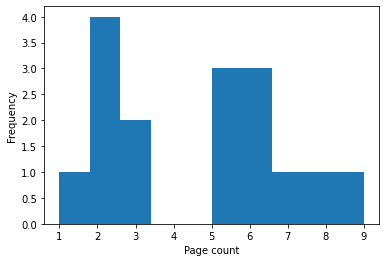

In [3]:
plot_page_count_histogram([5, 5, 6, 2, 7, 2, 6, 8, 1, 2, 3, 2, 3, 5, 6, 9])

In [4]:
def get_page_counts(folder_path, recursive=False):
    """Get the number of pages in each PDF file in FOLDER_PATH. Returns a dictionary with file paths (relative to the passed path)
    as keys and page counts as values. Encrypted files which cannot be accessed have page counts of -1.
    
    If RECURSIVE is True, then the function will also search subfolders of FOLDER_PATH. Otherwise, only the files in FOLDER_PATH
    will be searched."""
    page_counts = {}
    for path in Path(folder_path).rglob("*.pdf") if recursive else Path(folder_path).glob("*.pdf"):
        if path.is_file():
            with open(path, 'rb') as f:
                pdf = PdfReader(f)
                if pdf.isEncrypted:
                    page_counts[str(path)] = -1
                else:
                    page_counts[str(path)] = pdf.getNumPages()
    return page_counts

In [8]:
page_counts = get_page_counts("/Users/kabir", recursive=True)

incorrect startxref pointer(1)


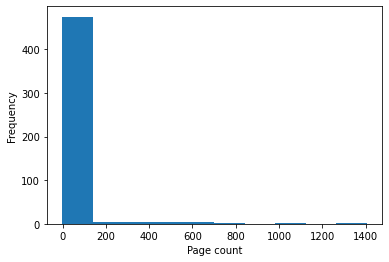

In [9]:
plot_page_count_histogram(page_counts.values())